# New Section

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn
!pip install visualkeras
import visualkeras
!pip install ann-visualizer
import ann_visualizer
from ann_visualizer.visualize import ann_viz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=3ecc659904f4415d067160aaa6c2d788f61fac71a897814b87a7f1f681a3319a
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann-visualizer


In [2]:
 ! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jagnibha20","key":"1153143ac7051f2e8b328ab2ad31bf2c"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 99% 277M/281M [00:09<00:00, 42.0MB/s]
100% 281M/281M [00:09<00:00, 31.3MB/s]


In [8]:
! mkdir dataset

In [9]:
! unzip indian-sign-language-isl.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Indian/V/819.jpg  
  inflating: dataset/Indian/V/82.jpg  
  inflating: dataset/Indian/V/820.jpg  
  inflating: dataset/Indian/V/821.jpg  
  inflating: dataset/Indian/V/822.jpg  
  inflating: dataset/Indian/V/823.jpg  
  inflating: dataset/Indian/V/824.jpg  
  inflating: dataset/Indian/V/825.jpg  
  inflating: dataset/Indian/V/826.jpg  
  inflating: dataset/Indian/V/827.jpg  
  inflating: dataset/Indian/V/828.jpg  
  inflating: dataset/Indian/V/829.jpg  
  inflating: dataset/Indian/V/83.jpg  
  inflating: dataset/Indian/V/830.jpg  
  inflating: dataset/Indian/V/831.jpg  
  inflating: dataset/Indian/V/832.jpg  
  inflating: dataset/Indian/V/833.jpg  
  inflating: dataset/Indian/V/834.jpg  
  inflating: dataset/Indian/V/835.jpg  
  inflating: dataset/Indian/V/836.jpg  
  inflating: dataset/Indian/V/837.jpg  
  inflating: dataset/Indian/V/838.jpg  
  inflating: dataset/Indian/V/839.jpg  
  inflating: dataset/Indian/V/8

In [10]:
data_folder = '/content/dataset/Indian'

In [11]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(data_folder))

    for folder in folders:
        index += 1

        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(data_folder + '/' + folder):
            img = cv2.imread(data_folder + '/' + folder + '/' + image, 0)


            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

    return x_train, x_test, y_train, y_test

def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [12]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [13]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=17)
x_test, y_test = shuffle(x_test, y_test, random_state=17)

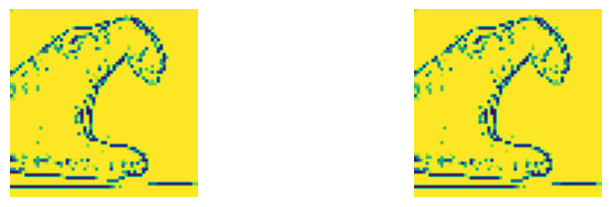

In [14]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

In [15]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [16]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3),padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])


In [17]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

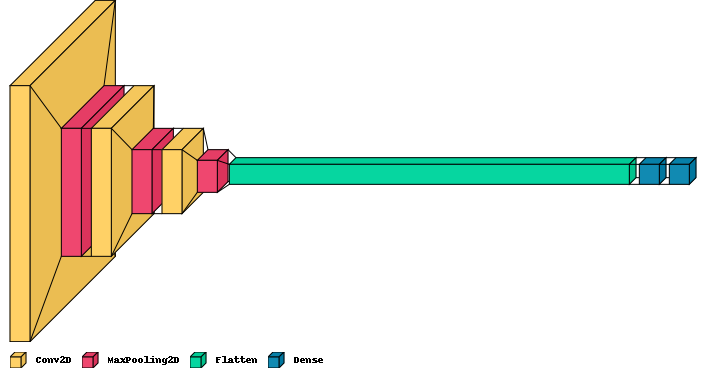

In [18]:
visualkeras.layered_view(model,legend=True)

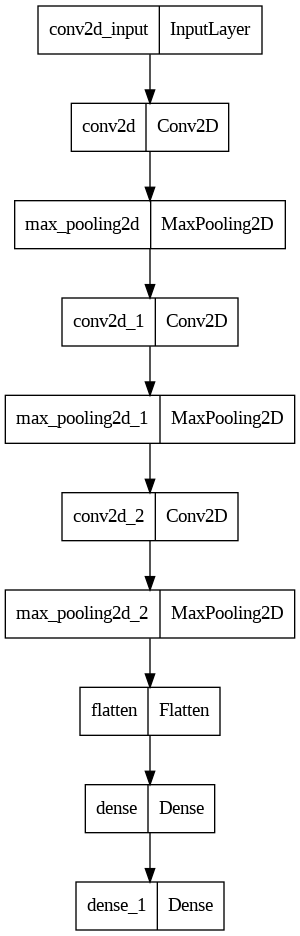

In [19]:
keras.utils.plot_model(model)

In [20]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [30]:
classes = 35
epochs = 50


adam = Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
1069/1069 - 8s - loss: 0.0181 - accuracy: 0.9974 - val_loss: 0.0089 - val_accuracy: 0.9987 - 8s/epoch - 7ms/step
Epoch 2/50
1069/1069 - 6s - loss: 0.0075 - accuracy: 0.9989 - val_loss: 0.0048 - val_accuracy: 0.9993 - 6s/epoch - 6ms/step
Epoch 3/50
1069/1069 - 6s - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9998 - 6s/epoch - 5ms/step
Epoch 4/50
1069/1069 - 6s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9995 - 6s/epoch - 6ms/step
Epoch 5/50
1069/1069 - 6s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0013 - val_accuracy: 0.9998 - 6s/epoch - 6ms/step
Epoch 6/50
1069/1069 - 6s - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0011 - val_accuracy: 0.9998 - 6s/epoch - 6ms/step
Epoch 7/50
1069/1069 - 6s - loss: 7.5586e-04 - accuracy: 0.9998 - val_loss: 7.1708e-04 - val_accuracy: 0.9999 - 6s/epoch - 6ms/step
Epoch 8/50
1069/1069 - 6s - loss: 5.8222e-04 - accuracy: 0.9998 - val_loss: 5.2711e-04 - val_accuracy: 0.9999 - 6s/epoch - 5

In [31]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [32]:
class_labels = list(map_characters.values())

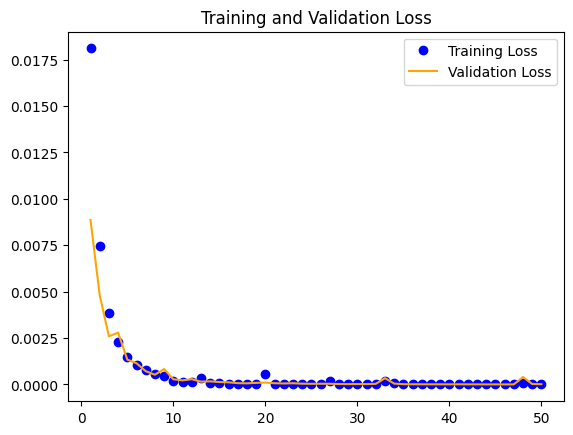

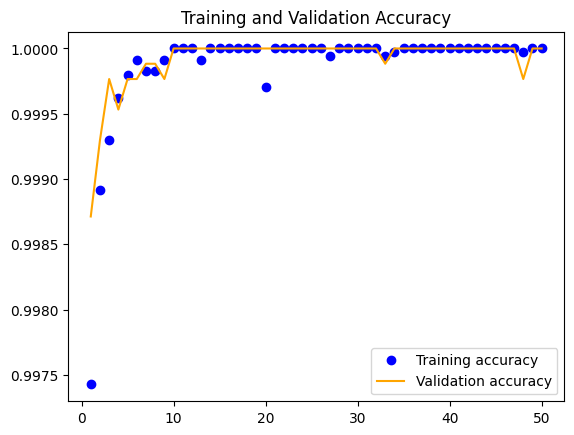

In [33]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [34]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='')
Y_pred_classes = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

[1.75316945387749e-05, 1.0]

Keras CNN - accuracy: 1.0 

268/268 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       232
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       260
           4       1.00      1.00      1.00       227
           5       1.00      1.00      1.00       249
           6       1.00      1.00      1.00       231
           7       1.00      1.00      1.00       238
           8       1.00      1.00      1.00       232
           9       1.00      1.00      1.00       261
           A       1.00      1.00      1.00       257
           B       1.00      1.00      1.00       204
           C       1.00      1.00      1.00       289
           D       1.00      1.00      1.00       208
           E       1.00      1.00      1.00       230
           F       1.00      1.00      1.00       252
           G       1.00

In [35]:
model.save('ISL_Predictor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


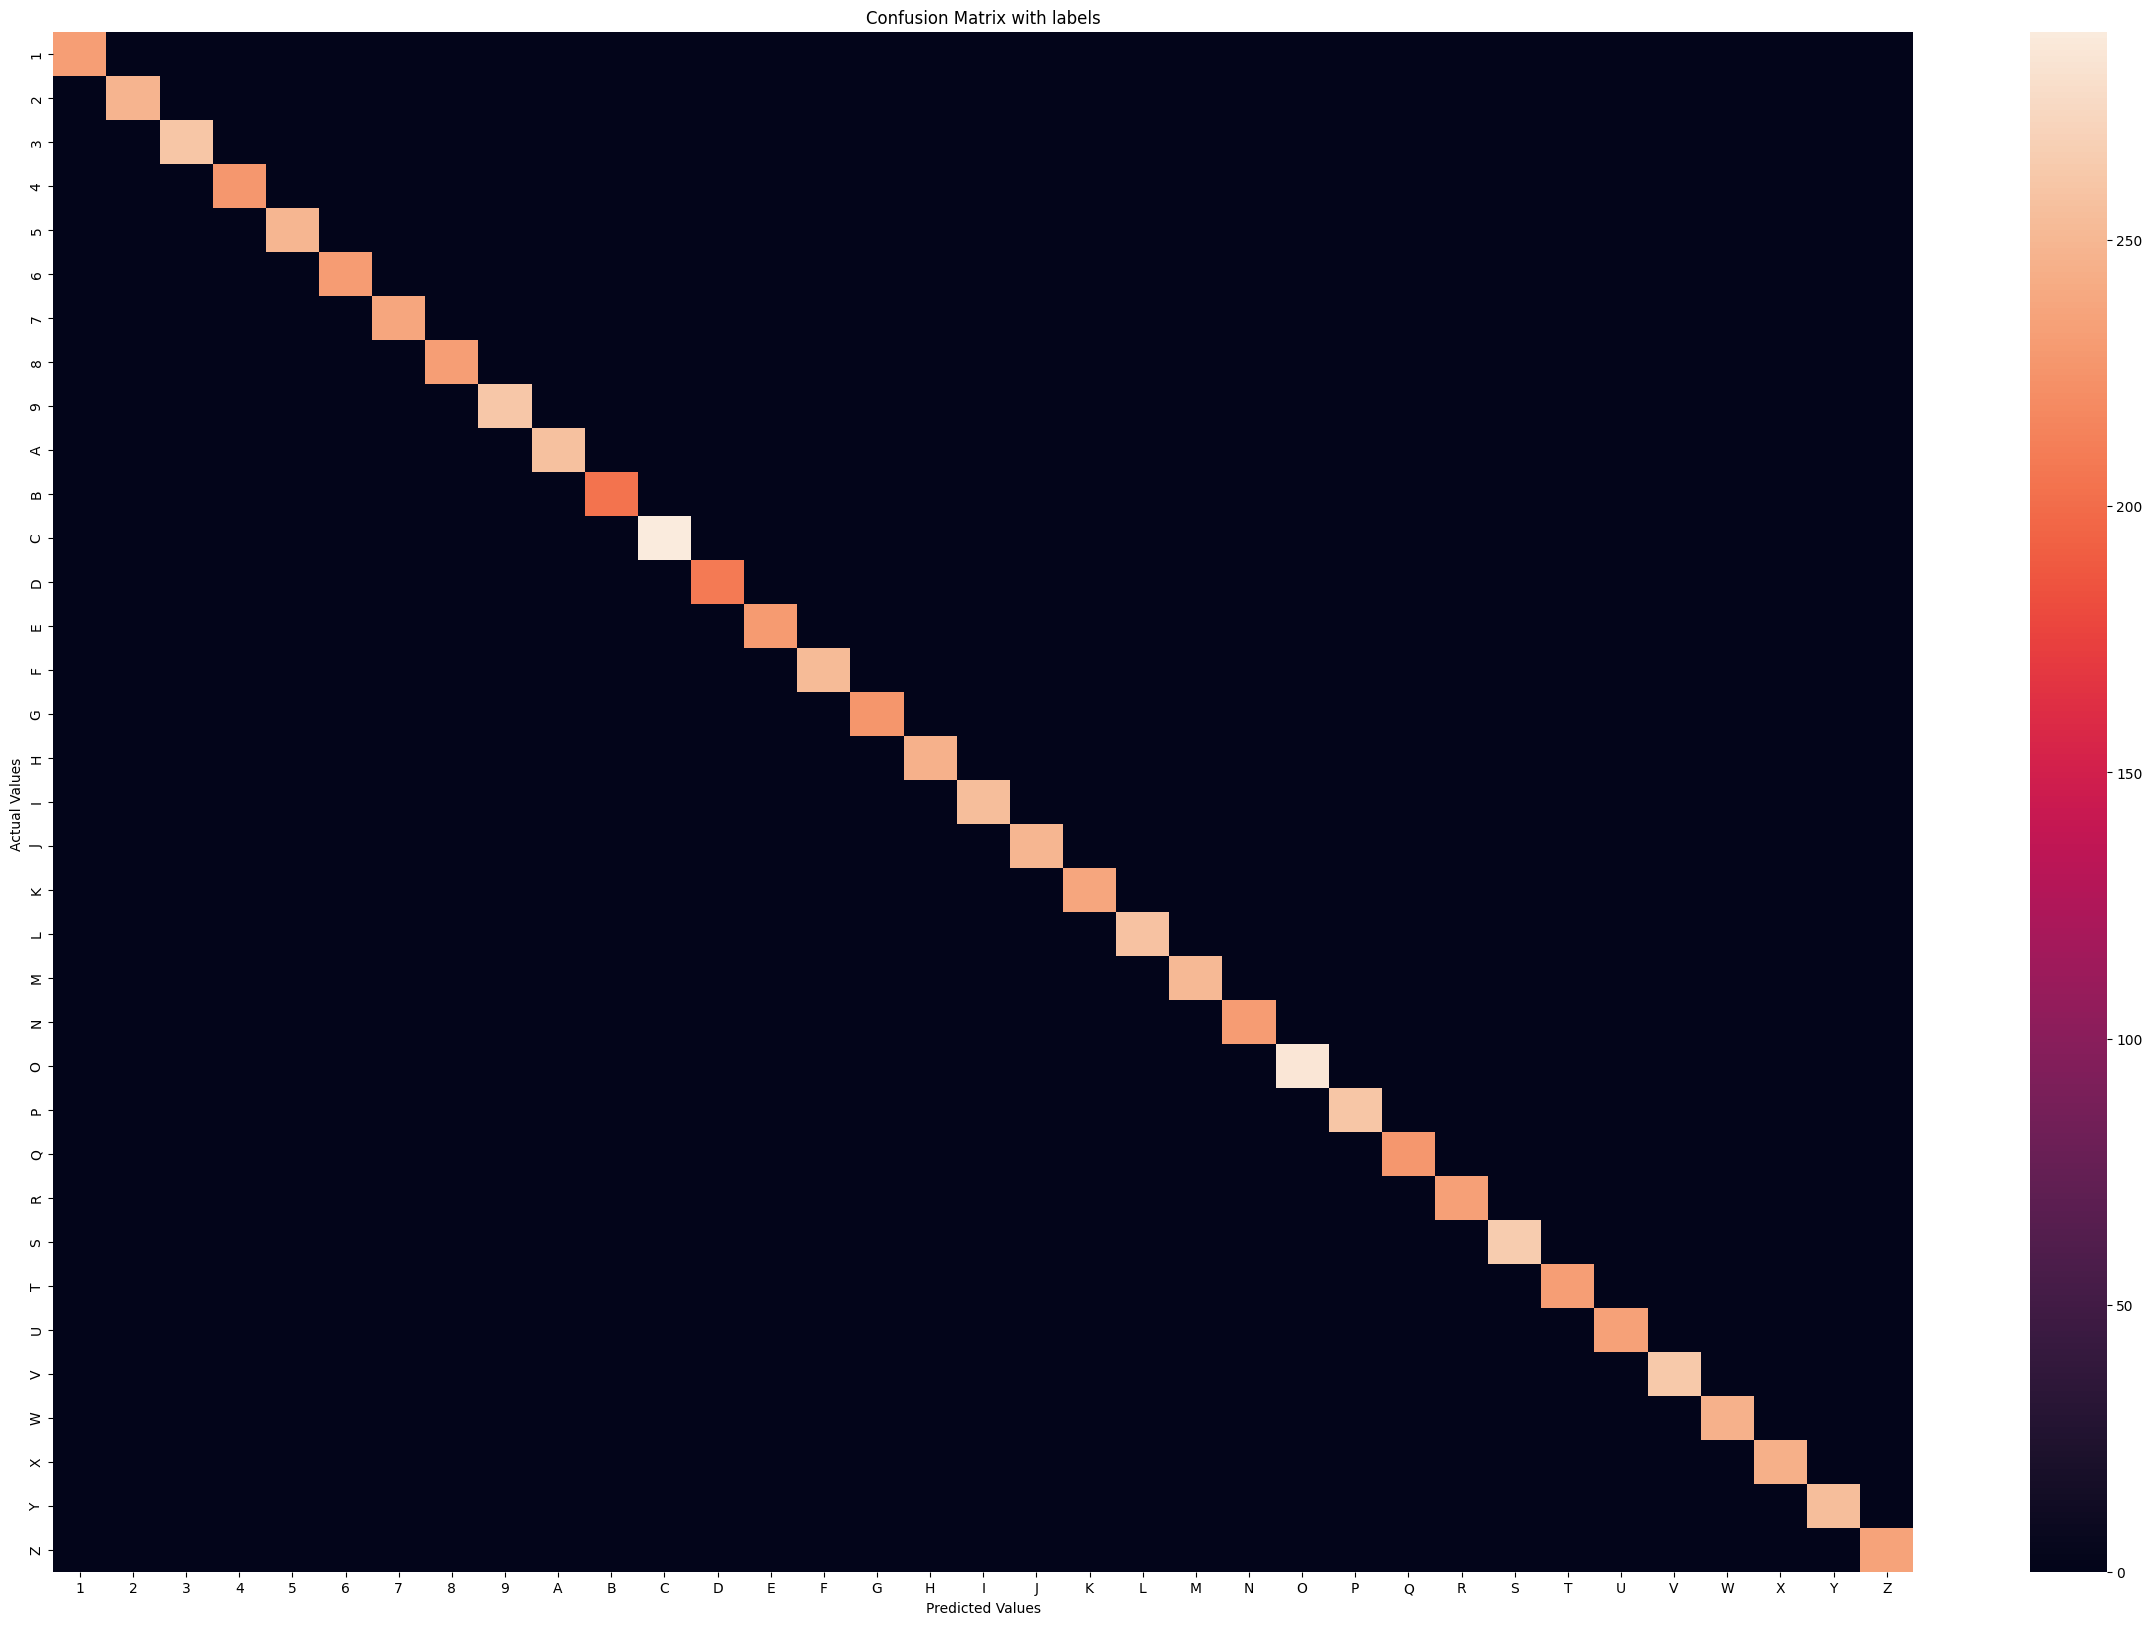

In [36]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [37]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[232   0   0 ...   0   0   0]
 [  0 248   0 ...   0   0   0]
 [  0   0 260 ...   0   0   0]
 ...
 [  0   0   0 ... 244   0   0]
 [  0   0   0 ...   0 255   0]
 [  0   0   0 ...   0   0 235]]


In [38]:
model=tf.keras.models.load_model('ISL_Predictor.h5')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0